# CMPINF 0010: Best Neighborhood - Final Report
### Group 40 members: Hongkun Yao, Lingfeng Fan

This notebook is a combination of our personal notebooks and provides a comprehensive analysis of the best neighborhood by considering three submetrics: pools capacity, public school enrollment, and arrests Rate. 

In this notebook, you will see our individual analysis of the above three factors and then a combined overarching metric to determine the best neighborhood in Pittsburgh. 

## 1. Best Neighborhood - Pools Capacity

Pools capacity is one of our submetrics to determine which of neighborhoods in Pittsburgh is the best.

In this section, we are using a dataset reflected pools capacity as well as which neighborhood they belong to. This dataset specifically has a column of neighborhood, which helps me to effectively collect capacity attribute for every neighborhood. Noticed that is is possible to have multiple pools in the same neighborhood.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# load the data from csv
pools = pd.read_csv("neighborhood_pools.csv")
pools.head(10)

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448728,-79.978329
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414766,-80.040555
2,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414997,-80.019173
3,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461997,-79.953313
4,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405073,-79.936899
5,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Troy Hill,1,24,42003240600,1,24,1,1-2,40.458746,-79.988369
6,1569871328,East Hills Spray Park,Spray Park,NaN,Wilkinsburg Penn,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,East Hills,9,13,42003130600,2,13,5,3-19,40.453099,-79.871039
7,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482019,-79.911283
8,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482178,-79.910931
9,878134116,Homewood,Pool,NaN,Pittsburgh Water and Sewer Authority,171075.0,https://tools.wprdc.org/images/pittsburgh/pool...,Homewood South,9,13,42003130300,2,13,5,3-17,40.454370,-79.899884


As we can tell based on the output generated by the previous cell, the data contains way too many unnecessary data attributes, since we only care about each pool's capacity and which neighborhood it belongs to, let's trim it before moving forward.

In [3]:
pools_trim = pools[['id', 'name', 'capacity', 'neighborhood']]
pools_trim.head(10)

,id,name,capacity,neighborhood
0,899591542,Ammon,538000.0,Bedford Dwellings
1,1003800828,Banksville,166320.0,Banksville
2,1688544652,Beechview Spray Park,NaN,Beechview
3,1533382756,Bloomfield,335000.0,Bloomfield
4,1287441950,Burgwin Spray Park,NaN,Hazelwood
5,168387727,Cowley Spray Park,NaN,Troy Hill
6,1569871328,East Hills Spray Park,NaN,East Hills
7,1475037865,Highland - Children,NaN,Highland Park
8,5446687,Highland - Main,560242.0,Highland Park
9,878134116,Homewood,171075.0,Homewood South


As we can tell from the generated table, there are some pools with NaN(missing value) capacity. Since capacity is our standard to determine the best neighborhood, we need to repace  NaN capacity with 0 first.

In [4]:
pools_trim['capacity'] = pools_trim['capacity'].fillna(0)
pools_trim.head(10)

<ipython-input-4-1fb15b70e4ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pools_trim['capacity'] = pools_trim['capacity'].fillna(0)


,id,name,capacity,neighborhood
0,899591542,Ammon,538000.0,Bedford Dwellings
1,1003800828,Banksville,166320.0,Banksville
2,1688544652,Beechview Spray Park,0.0,Beechview
3,1533382756,Bloomfield,335000.0,Bloomfield
4,1287441950,Burgwin Spray Park,0.0,Hazelwood
5,168387727,Cowley Spray Park,0.0,Troy Hill
6,1569871328,East Hills Spray Park,0.0,East Hills
7,1475037865,Highland - Children,0.0,Highland Park
8,5446687,Highland - Main,560242.0,Highland Park
9,878134116,Homewood,171075.0,Homewood South


Let's take a look at their rough ranking based on each pool's capacity first!

In [5]:
pools_trim = pools_trim.sort_values('capacity', ascending=False)
pools_trim

,id,name,capacity,neighborhood
8,5446687,Highland - Main,560242.0,Highland Park
0,899591542,Ammon,538000.0,Bedford Dwellings
14,2077053611,Moore,417657.0,Brookline
18,43656340,Ream,356000.0,Mount Washington
3,1533382756,Bloomfield,335000.0,Bloomfield
21,976230017,Sheraden,278000.0,Sheraden
22,927599833,Sue Murray,271000.0,Allegheny Center
17,1704750315,Phillips - Main,224100.0,Carrick
24,558965267,West Penn,215451.0,Polish Hill
10,2092220498,Jack Stack,205800.0,Brighton Heights


But what if each neighborhood has multiple pools and the total capacity becomes much larger? Here I'm creating a mini HashMap class for the sake of convenience to categorize pools that are located in the same neighborhood. The key of this hashmap are neighborhoods, and the values correspond to pool capacities, so we can have a comprehensive analysis of pool capacities for each neighborhood.

In [6]:
# hashmap

class HashMap:
    def __init__(self):
        self.hash_map = {}

    def set_val(self, key, value):
        self.hash_map[key] = value

    def get_val(self, key):
        return self.hash_map.get(key)

    def del_val(self, key):
        if key in self.hash_map:
            del self.hash_map[key]

hash_map = HashMap()

for index, row in pools_trim.iterrows():
    if hash_map.get_val(row['neighborhood']) is None:
        hash_map.set_val(row['neighborhood'], row['capacity'])
    else:
        temp = hash_map.get_val(row['neighborhood'])
        hash_map.set_val(row['neighborhood'], temp+row['capacity'])
    
print(hash_map.hash_map)

{'Highland Park': 560242.0, 'Bedford Dwellings': 538000.0, 'Brookline': 417657.0, 'Mount Washington': 356000.0, 'Bloomfield': 335000.0, 'Sheraden': 278000.0, 'Allegheny Center': 271000.0, 'Carrick': 224100.0, 'Polish Hill': 215451.0, 'Brighton Heights': 205800.0, 'Perry North': 205800.0, 'South Side Flats': 312800.0, 'Greenfield': 195000.0, 'Squirrel Hill South': 187600.0, 'Homewood South': 171075.0, 'Banksville': 166320.0, 'Westwood': 156840.0, 'Lincoln Place': 18000.0, 'Hazelwood': 0.0, 'Shadyside': 0.0, 'Beechview': 0.0, 'Beltzhoover': 0.0, 'East Hills': 0.0, 'Troy Hill': 0.0, 'South Side Slopes': 0.0, 'Lincoln-Lemington-Belmar': 0.0}


Now let's get our keys(neighborhoods) and values(capacities) from hashmap. Noticed that we have to use hash_map.hash_map to print out the content and access the underlying dictionary structure.

In [7]:
keys_list = list(hash_map.hash_map.keys())
values_list = list(hash_map.hash_map.values())

Now we have everything we need to build our statistic bar diagram using matplotlib.pyplot.

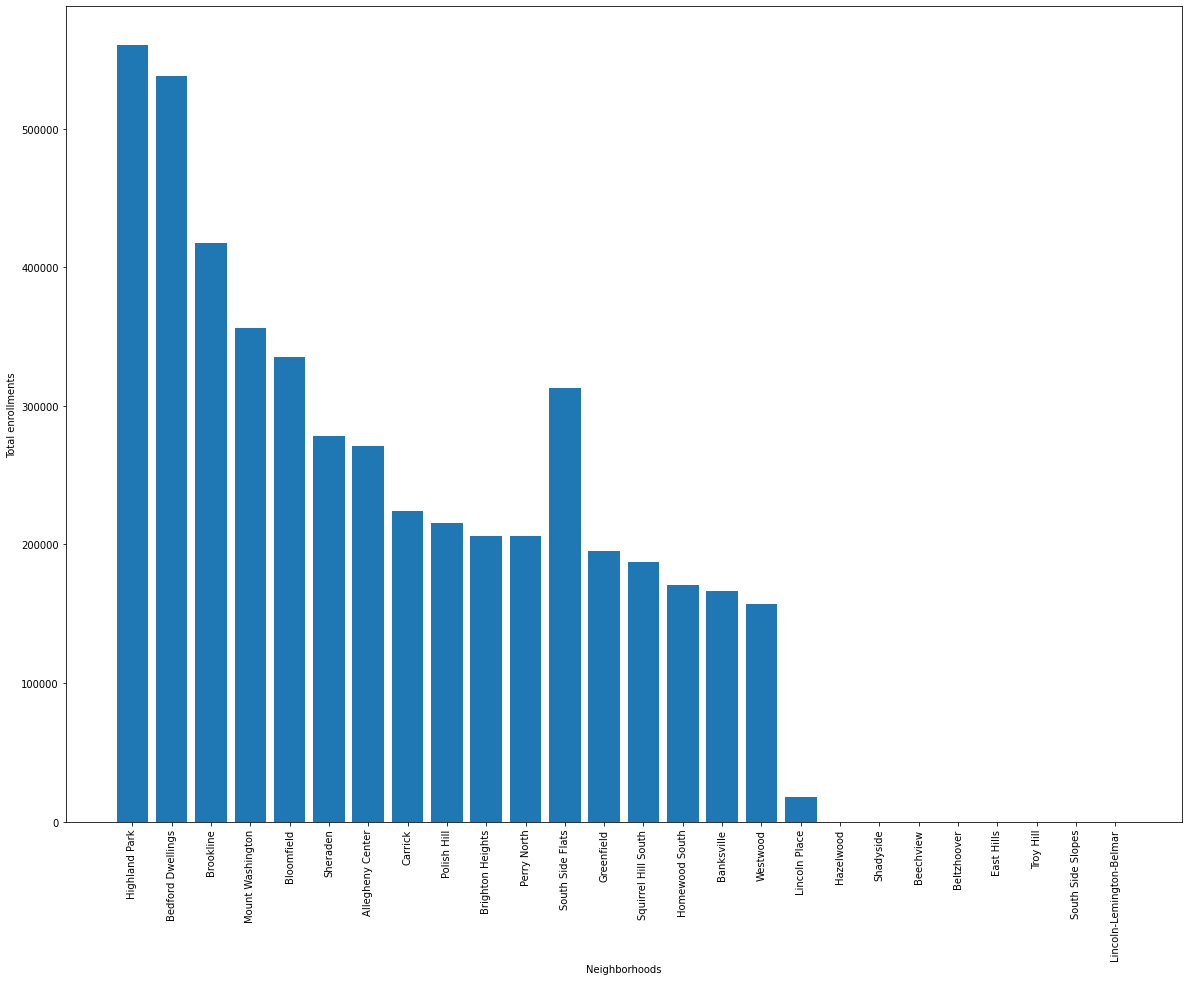

In [9]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)

plt.bar(keys_list, values_list);

plt.xticks(rotation ='vertical')

plt.xlabel('Neighborhoods')
plt.ylabel('Total enrollments')

plt.show()

### Summary about pool capacity

As we can tell from the bar diagram, Highland Park neighborhood has the largest capacity of pools. Therefore, Highland Park is the best neighborhood under the submetric stand of pool capacity. 

## 2. Best Neighborhood - Public School Enrollment

Public school enrollment is one of our submetrics to determine which of neighborhoods in Pittsburgh is the best.

In this section, we are using a dataset reflected public school enrollments for each neighborhood. This dataset specifically has a column of neighborhood, which helps me to effectively collect total_students_enrolled data for every neighborhood. 


In [10]:
enrollments = pd.read_csv("neighborhood_enrollment.csv")
enrollments.head(10)

,neighborhood,african_american,american_indian,asian__not_pacific_islander,hispanic,multiracial,native_hawaiian_or_other_pacific_islander,white,total_students_enrolled,student_count_redactions,attending_feeder,attending_nonfeeder,total_with_feeder_status,feeder_count_redactions,grade_level
0,Allegheny Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
1,Allegheny West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,Pre-K
2,Allentown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
3,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
4,Arlington Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,Pre-K
5,Banksville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
6,Bedford Dwellings,12.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,N,NaN,NaN,NaN,NaN,Pre-K
7,Beechview,NaN,NaN,NaN,13.0,NaN,NaN,19.0,44.0,Y,NaN,NaN,NaN,NaN,Pre-K
8,Beltzhoover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
9,Bloomfield,NaN,NaN,NaN,NaN,NaN,NaN,16.0,21.0,Y,NaN,NaN,NaN,NaN,Pre-K


As we can tell based on the output from the previous cell, the data contains way too many unnecessary data attributes. Let's trim it before move forward.

In [11]:
# cut off all columns except for neighborhood, total_students_enrolled
enrollments_trim = enrollments[['neighborhood', 'total_students_enrolled' ]]
enrollments_trim.head(10)

,neighborhood,total_students_enrolled
0,Allegheny Center,NaN
1,Allegheny West,NaN
2,Allentown,NaN
3,Arlington,NaN
4,Arlington Heights,NaN
5,Banksville,NaN
6,Bedford Dwellings,12.0
7,Beechview,44.0
8,Beltzhoover,NaN
9,Bloomfield,21.0


After we trim the data, it only contains the columns of neighborhood and total students enrolled now. But unfortunately, there are some NaN values which is short of “Not a Number” (missing values). We need to deal with those values in order for data to be sorted before running further analysis.

In [12]:
enrollments_trim['total_students_enrolled'] = enrollments_trim['total_students_enrolled'].fillna(0)
enrollments_trim.head(10)

<ipython-input-12-90307074dd3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrollments_trim['total_students_enrolled'] = enrollments_trim['total_students_enrolled'].fillna(0)


,neighborhood,total_students_enrolled
0,Allegheny Center,0.0
1,Allegheny West,0.0
2,Allentown,0.0
3,Arlington,0.0
4,Arlington Heights,0.0
5,Banksville,0.0
6,Bedford Dwellings,12.0
7,Beechview,44.0
8,Beltzhoover,0.0
9,Bloomfield,21.0


In [14]:
# sort the data

enrollments_trim = enrollments_trim.sort_values('total_students_enrolled', ascending=False)
enrollments_trim.head(10)

,neighborhood,total_students_enrolled
107,Carrick,541.0
105,Brookline,526.0
286,Carrick,378.0
99,Beechview,339.0
284,Brookline,310.0
104,Brighton Heights,296.0
197,Carrick,293.0
168,Squirrel Hill South,286.0
131,Homewood North,282.0
195,Brookline,276.0


Now we have our new data with descending order, so we can clearly tell which neighborhoods have more students enrolled in public schools. Let's visualize our data with bar diagram.

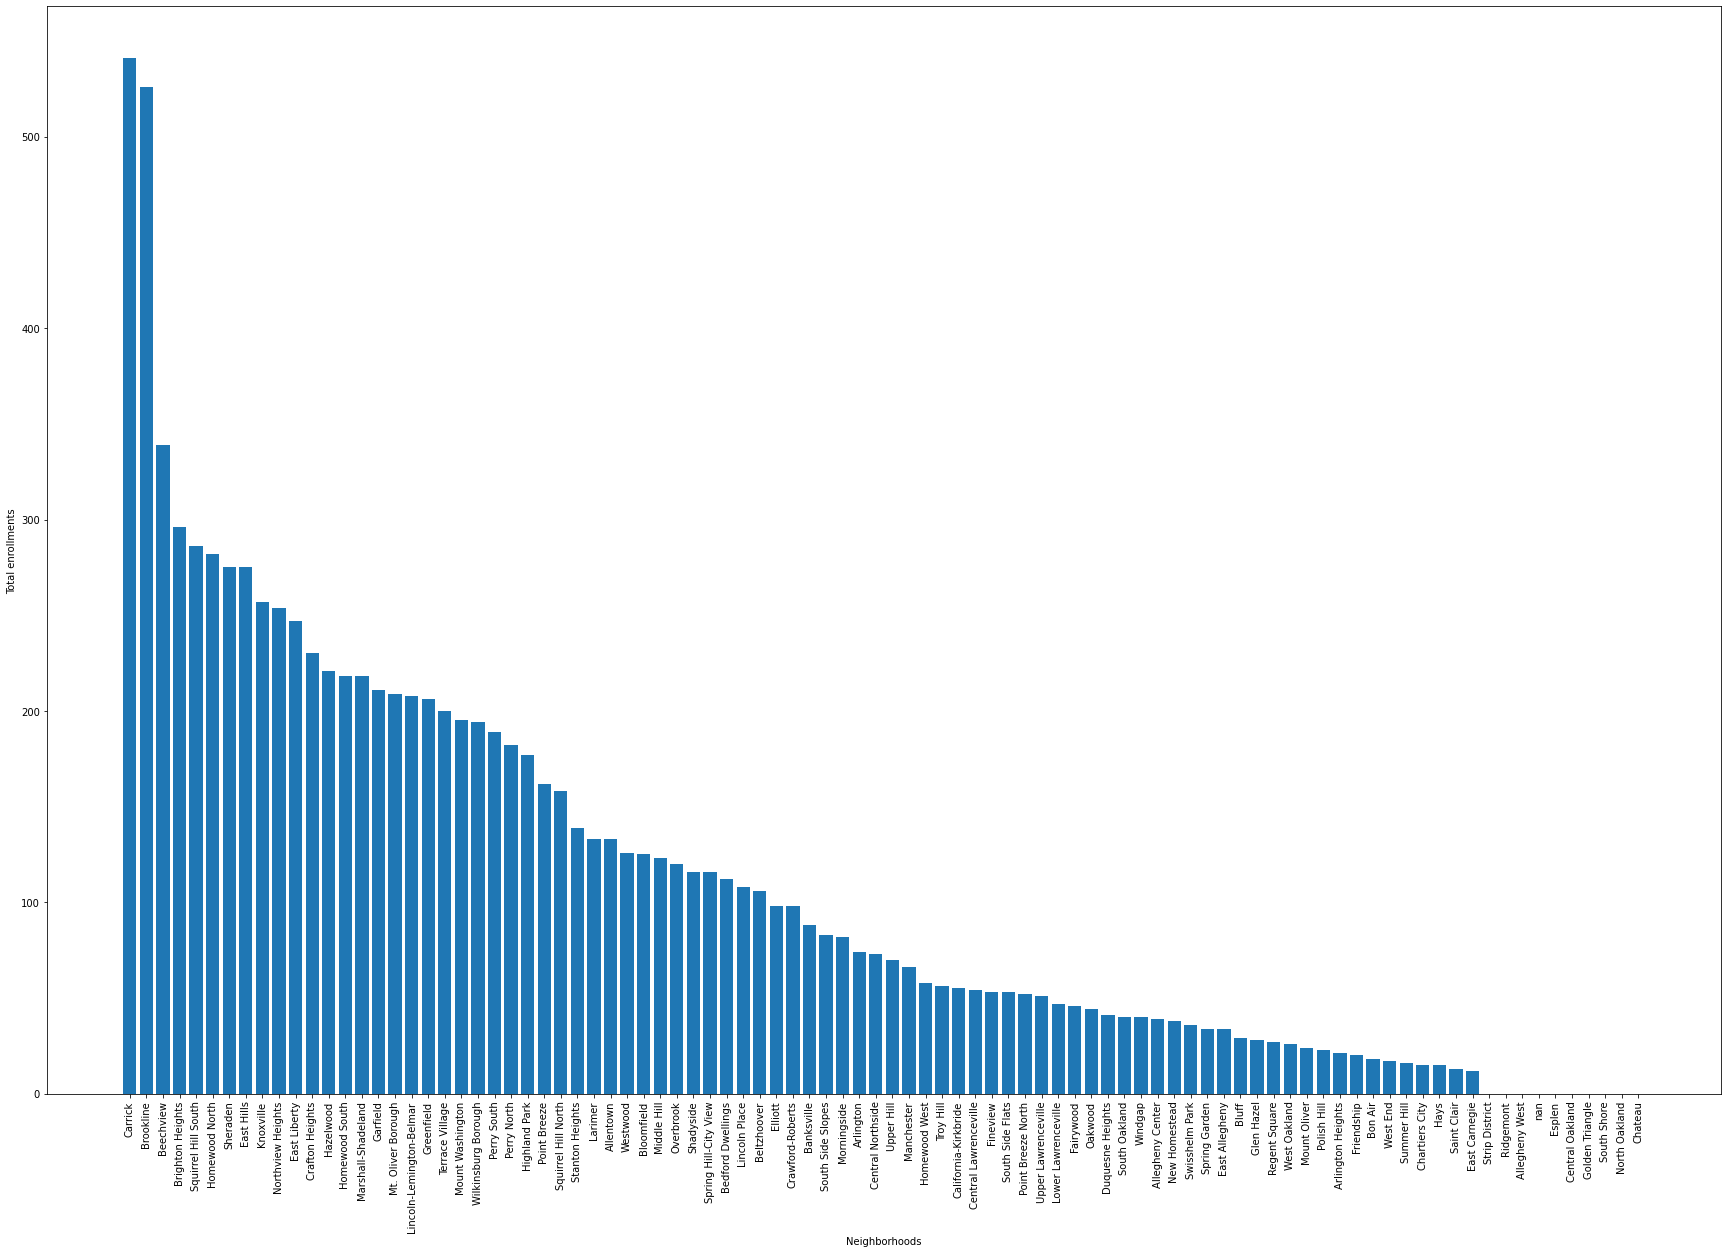

In [15]:
# draw the bar diagram

# enrollments_trim.plot(x='neighborhood',y='total_students_enrolled', kind='bar', rot=90, figsize = (40,30))

neighborhood= enrollments_trim['neighborhood'].astype(str);
total_students_enrolled= enrollments_trim['total_students_enrolled'].astype(int);

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(20)

plt.bar(neighborhood, total_students_enrolled);

plt.xticks(rotation ='vertical')

plt.xlabel('Neighborhoods')
plt.ylabel('Total enrollments')

plt.show()

Now we have a rough bar diagram, but it is defintely not beautiful enough. Let's make it elegant by only displaying the neighborhoods with total public school enrollments above 200.

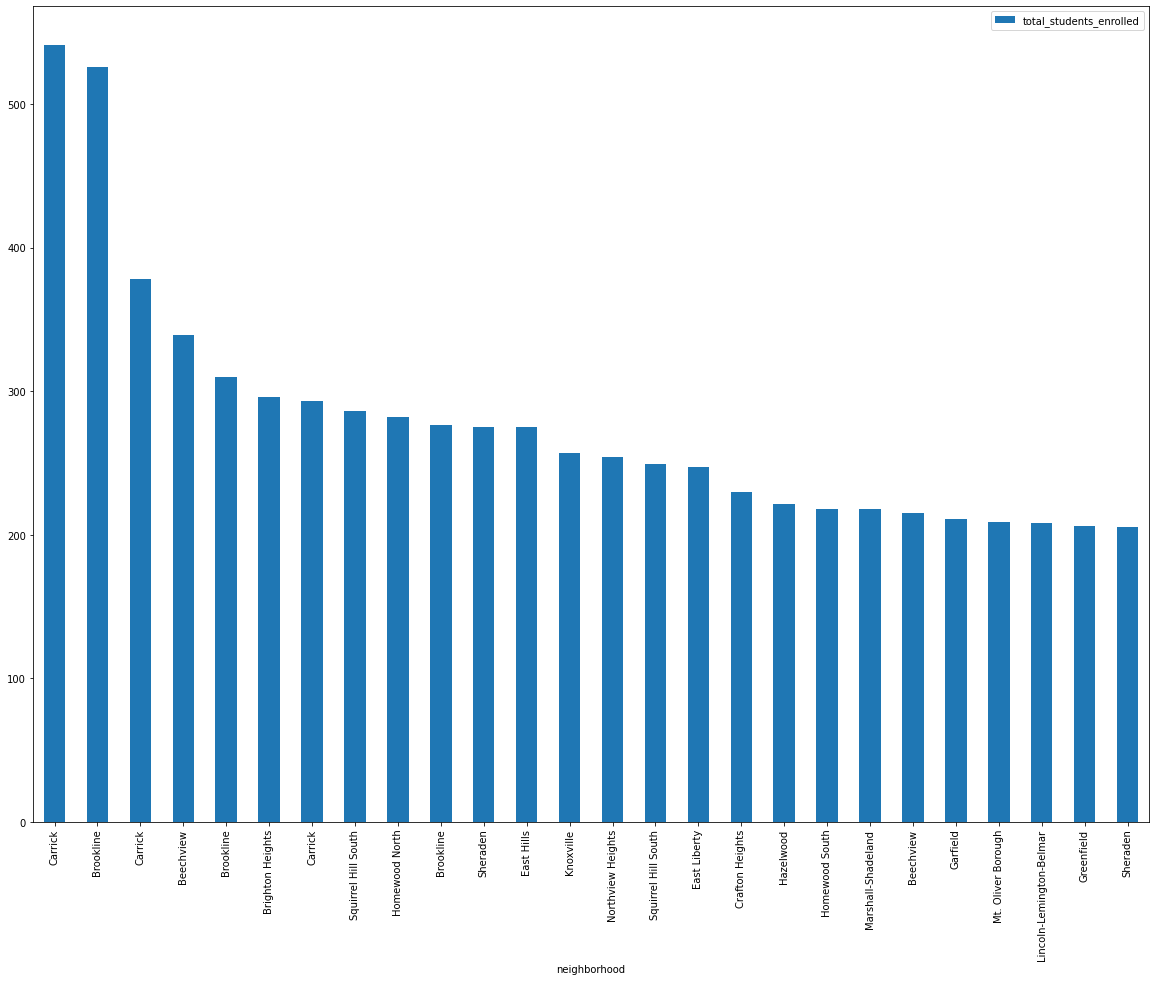

In [16]:
enrollments_bar = enrollments_trim[enrollments_trim['total_students_enrolled']>200]

enrollments_bar.plot(x='neighborhood',y='total_students_enrolled', kind='bar', rot=90, figsize = (20,15))

### Summary about public school enrollment

As we can tell from the above statistics and dar diagram, Carrick neighborhood has the highest public school enrollments, so Carrick wins this round! However, the above analysis is not comprehensive for sure, because first of all, it is based on a dataset from 2021, which is outdated as this point; second, this dataset only collects information about public schools, which means plenty of private schools are not counted towards our analysis; last, the public school enrollments is not the exclusive standard to determine the best neighborhood, and the anaylsis itself is subjective. Therefore, we need to combine more factors to make our answer more convincing.

## 3. Best Neighborhood - Pittsburgh Arrests Rate

Safety is the most important consideration of estimating the quality of neighborhoods. Arrests data can prove the crime rate of a neighborhood and help us to determine the best neighborhood in Pittsburgh.

In this section, we are using the bar diagram as well to visualize the arrests data in each neighborhood. Because of this datasets presents the arrests data by the number of appearing of each neighborhood. we used the value count method to count number of rows with each unique value of variable.

In [17]:
#import arrest dataset
pittarrest = pd.read_csv("pittarrest.csv", sep=",")
#get the random 10 datas
pittarrest.sample(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
45058,2032704,20213381,32.0,M,W,2020-11-16T00:03:00,"2600 Block Josephine ST Pittsburgh, PA 15203",2701 Simple Assault.,"2600 Block Josephine ST Pittsburgh, PA 15203",South Side Slopes,3,1608.0,3.0,3.0,-79.969875,40.424001
52480,2043521,21207561,59.0,F,B,2021-11-15T01:17:00,Zone 5,3925 Receiving Stolen Property.,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN
43104,2030160,20151702,31.0,M,B,2020-08-16T18:59:00,"7700 Block Tioga ST Pittsburgh, PA 15221",2701 Simple Assault.,"7700 Block Tioga ST Pittsburgh, PA 15221",Homewood South,5,1304.0,9.0,2.0,-79.890018,40.451241
53650,2045155,22010812,37.0,M,B,2022-01-31T20:40:00,"600 Block 1st AV Pittsburgh, PA 15219",3701 Robbery. / 2701(a)(1) Simple Assault - In...,"6600 Block Jackson ST Pittsburgh, PA 15206",Highland Park,5,1106.0,7.0,2.0,-79.911902,40.474094
40401,2026269,19202226,56.0,F,B,2019-10-04T19:21:00,"1000 Block Sheffield ST Pittsburgh, PA 15233",2702 Aggravated Assault. / 5101 Obstructing Ad...,"1000 Block Sheffield ST Pittsburgh, PA 15233",Manchester,1,2107.0,NaN,NaN,NaN,NaN
33809,2017640,19158825,43.0,M,W,2019-08-12T11:10:00,"600 Block 1ST AV Pittsburgh, PA 15219",2709(a)(4) Harassment Communicates Prohibited ...,"600 Block 1st AV Pittsburgh, PA 15219",Central Business District,2,201.0,6.0,6.0,-79.996041,40.435040
7492,1983942,17069133,25.0,M,W,2017-04-18T19:15:00,"900 Block 2nd AV Pittsburgh, PA 15219",2706 Terroristic Threats. / 2709(a) Harassment.,"1800 Block Forbes AV Pittsburgh, PA 15219",Bluff,2,103.0,6.0,3.0,-79.981322,40.437345
924,1975626,16165414,17.0,M,B,2016-09-02T13:51:00,"30 Block E Carson ST Pittsburgh, PA 15219",903 Criminal Conspiracy. / 2702 Aggravated Ass...,"200 Block Lelia ST Pittsburgh, PA 15211",Mount Washington,3,1915.0,2.0,5.0,-80.010300,40.421822
36905,2021489,19238201,22.0,M,B,2019-11-22T06:05:00,"300 Block N Taylor AV Pittsburgh, PA 15212",3925 Receiving Stolen Property. / 4910 Tamperi...,"300 Block N Taylor AV Pittsburgh, PA 15212",Central North Side,1,2206.0,1.0,1.0,-80.010271,40.456854
56067,2048723,22078779,27.0,M,W,2022-06-06T17:05:00,"900 Block Second AV Pittsburgh, PA 15219","2701(a)(1) Simple Assault - Intent., Know., Re...","400 Block Gold WY Pittsburgh, PA 15213",North Oakland,4,507.0,NaN,NaN,NaN,NaN


Now we need to calculate the frequency of arrests happend in each neighborhood.

In [42]:
neighborhood_num = pittarrest["INCIDENTNEIGHBORHOOD"].nunique()
#get the arrest number in different neighborhoods
arrests_num = pittarrest["INCIDENTNEIGHBORHOOD"].value_counts()


Now we can get the number of arrests in Pittsrbugh's every neighborhoods to build our visualization.

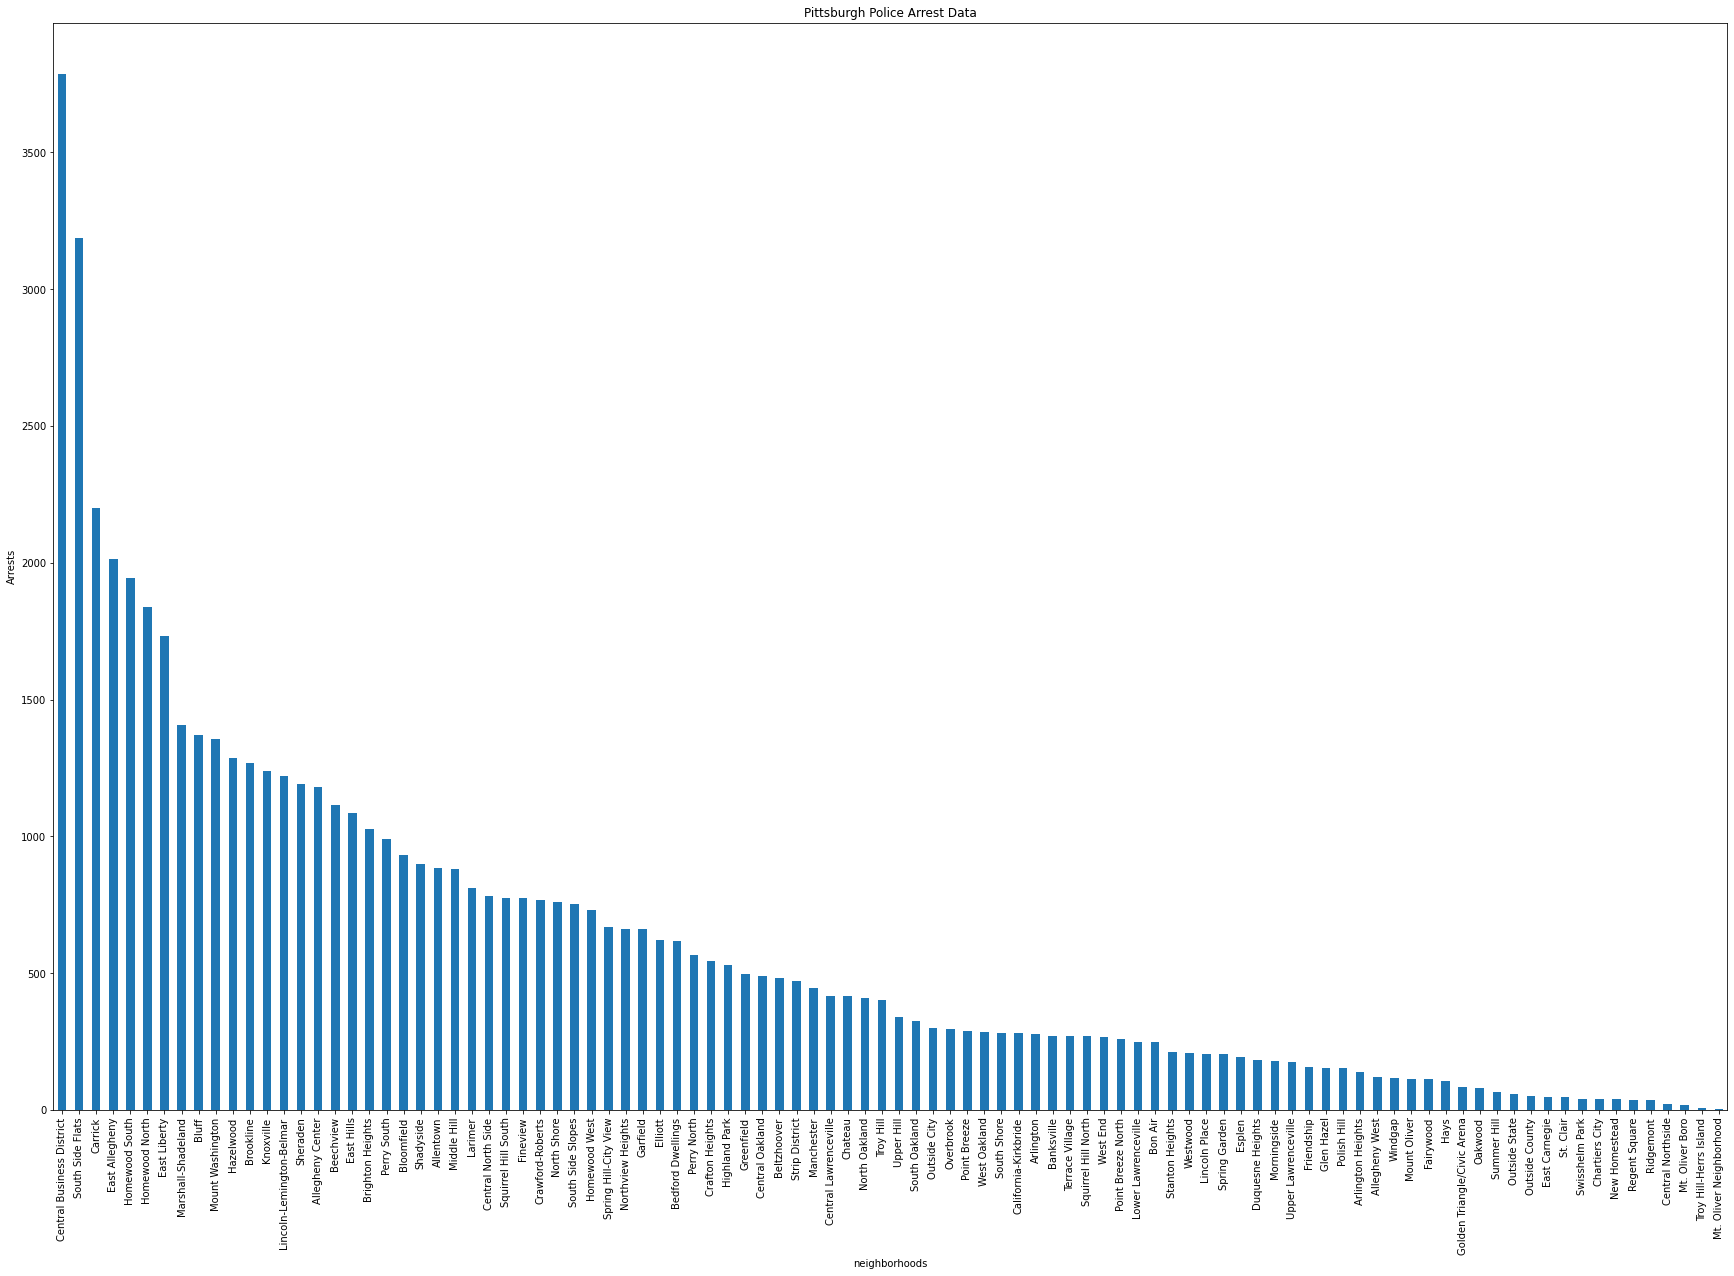

In [36]:
plt.title('Pittsburgh Police Arrest Data')
plt.ylabel('Arrests')
plt.xlabel('neighborhoods')

arrests_num.sort_values(ascending = False)[:neighborhood_num].plot.bar(figsize=(30,20))

This is the bar diagram which described the arrest data in all Pittsburgh neighborhoods. Then, we will choose the least five neighborhoods to get better visualization results. Neighborhood is more safety when less arrests were recorded.

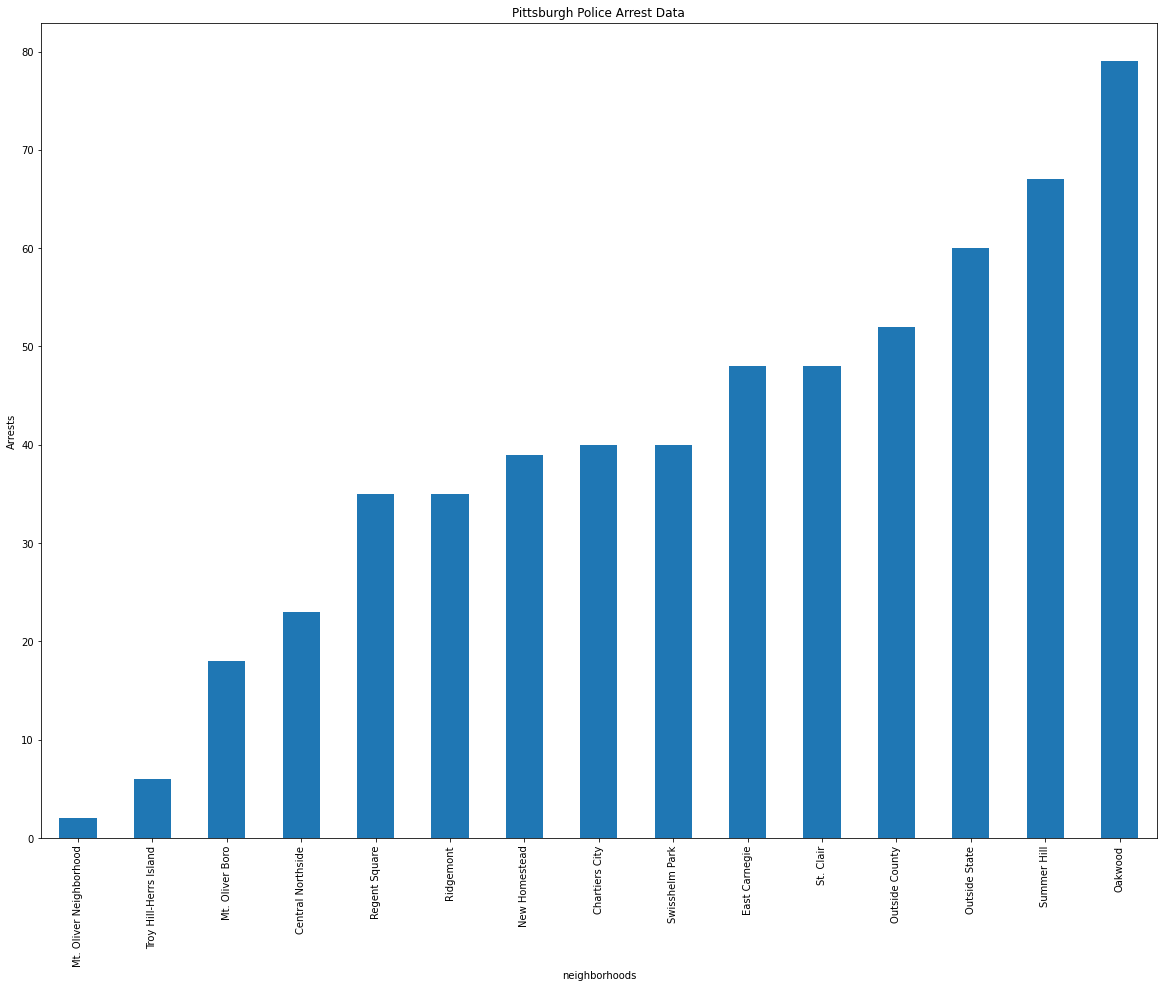

In [40]:
plt.title('Pittsburgh Police Arrest Data')
plt.ylabel('Arrests')
plt.xlabel('neighborhoods')
arrests_num.sort_values(ascending = True)[0:15].plot.bar(figsize=(20,15))

### Summary for arrests rate

In the bar char, we can conclude that Mt. Oliver Neighborhood has the least arrests, and Central Business District has most arrests, which means Mt. Oliver Neighborhood is relatively more safe than other neighborhoods. However, we should also consider about the population and police number in different neighborhood. We can not conclude Mt. Oliver Neighborhood is the best neighborhood in Pittsburgh only based on the number of arrests. Now our next step is to combine all three factors to determine the best neighborhood.

## Combined metrics - pools capacity, public school enrollment, arrests rate

## Conclusion
